In [1]:
import sqlite3

def create_sqlite_database(filename):
    """ create a database connection to an SQLite database """
    conn = None
    try:
        conn = sqlite3.connect(filename)
        print(sqlite3.sqlite_version)
    except sqlite3.Error as e:
        print(e)
    finally:
        if conn:
            conn.close()


create_sqlite_database("my.db")

3.31.1


In [2]:
import pandas as pd
dataPath = 'BankCustomerData.csv'

df = pd.read_csv(dataPath)
df["id"] = df.index + 1
print(df)

       age           job  marital  education default  balance housing loan  \
0       58    management  married   tertiary      no     2143     yes   no   
1       44    technician   single  secondary      no       29     yes   no   
2       33  entrepreneur  married  secondary      no        2     yes  yes   
3       47   blue-collar  married    unknown      no     1506     yes   no   
4       33       unknown   single    unknown      no        1      no   no   
...    ...           ...      ...        ...     ...      ...     ...  ...   
42634   21       student   single  secondary      no     2488      no   no   
42635   87       retired  married    primary      no     2190      no   no   
42636   34   blue-collar  married    primary      no     6718      no   no   
42637   22       student   single  secondary      no      254      no   no   
42638   32    management   single   tertiary      no     1962      no   no   

         contact  day month  duration  campaign  pdays  previou

In [3]:
conn = sqlite3.connect("my.db")
sql_data = df.to_sql(name = "data_2nf", con = conn, if_exists='replace', index=True)


In [4]:
tables = pd.read_sql(""" SELECT * FROM sqlite_master WHERE type = 'table'; """, conn)

In [5]:
print(tables)

    type      name  tbl_name  rootpage  \
0  table         t         t         2   
1  table      data      data         3   
2  table       job       job      1740   
3  table  data_2nf  data_2nf      4359   

                                                 sql  
0                        CREATE TABLE t (col1, col2)  
1  CREATE TABLE "data" (\n"age" INTEGER,\n  "job"...  
2  CREATE TABLE "job" (\n"age" INTEGER,\n  "job" ...  
3  CREATE TABLE "data_2nf" (\n"index" INTEGER,\n ...  


In [6]:
customers = pd.read_sql("SELECT * FROM data_2nf;", conn)
print(customers)
#looks like the database is in 2nf

       index  age           job  marital  education default  balance housing  \
0          0   58    management  married   tertiary      no     2143     yes   
1          1   44    technician   single  secondary      no       29     yes   
2          2   33  entrepreneur  married  secondary      no        2     yes   
3          3   47   blue-collar  married    unknown      no     1506     yes   
4          4   33       unknown   single    unknown      no        1      no   
...      ...  ...           ...      ...        ...     ...      ...     ...   
42634  42634   21       student   single  secondary      no     2488      no   
42635  42635   87       retired  married    primary      no     2190      no   
42636  42636   34   blue-collar  married    primary      no     6718      no   
42637  42637   22       student   single  secondary      no      254      no   
42638  42638   32    management   single   tertiary      no     1962      no   

      loan    contact  day month  durat

In [7]:
old_customers = pd.read_sql("SELECT Count(*) as old_customers FROM data_2nf WHERE age >50;", conn)
print(old_customers)


   old_customers
0           8457


In [8]:
rich_customers = pd.read_sql("SELECT balance, id FROM data_2nf WHERE balance >10000 ORDER BY balance DESC;", conn)
print(rich_customers)

     balance     id
0     102127  39990
1      98417  26228
2      81204  42559
3      71188  41694
4      66721  19786
..       ...    ...
765    10031  25172
766    10021  26352
767    10005  15206
768    10005  18583
769    10005  32058

[770 rows x 2 columns]


In [9]:
# Now we visualise data 
df.describe()

,age,balance,day,duration,campaign,pdays,previous,id
count,42639.000000,42639.000000,42639.000000,42639.000000,42639.000000,42639.000000,42639.000000,42639.000000
mean,40.788808,1331.863951,15.854781,255.957504,2.816412,34.169141,0.465442,21320.000000
std,10.200236,3011.537676,8.293901,258.361368,3.163564,92.041713,2.166705,12308.963401
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,1.000000
25%,33.000000,62.000000,8.000000,101.000000,1.000000,-1.000000,0.000000,10660.500000
50%,39.000000,429.000000,16.000000,177.000000,2.000000,-1.000000,0.000000,21320.000000
75%,48.000000,1381.500000,21.000000,315.000000,3.000000,-1.000000,0.000000,31979.500000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,536.000000,275.000000,42639.000000


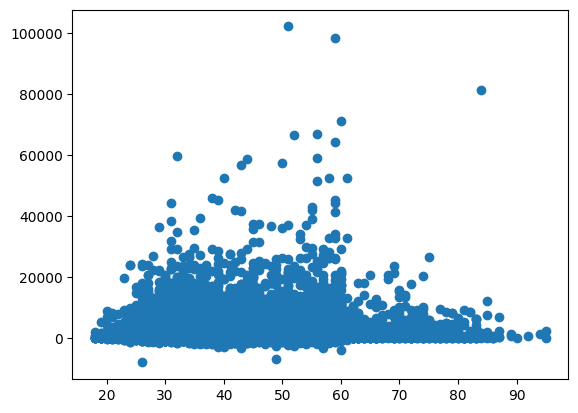

In [10]:
#plot of age against balance
from matplotlib import pyplot as plt
plt.scatter(df['age'], df['balance'])
plt.show()
#looks like no direct correlation against age and balance 

Text(0.5, 1.0, 'Distribution of Age')

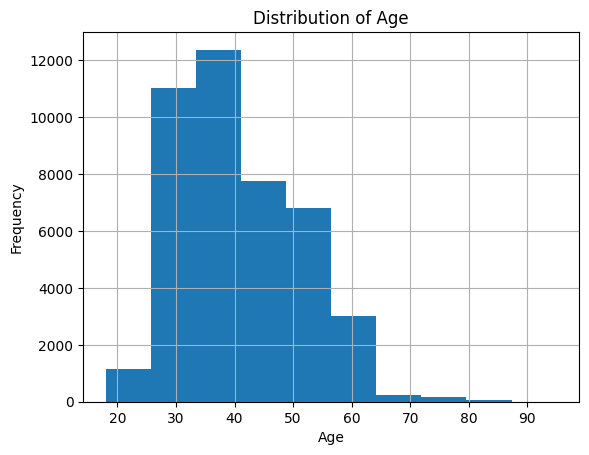

In [13]:
df['age'].hist()

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')

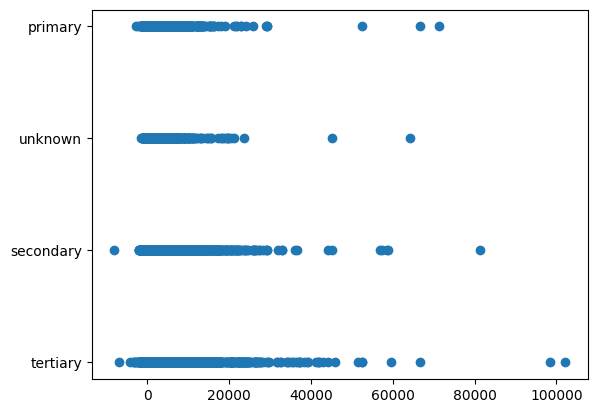

In [18]:
plt.scatter(df['balance'], df['education'])
plt.show()
#tertiary education seems to lead to higher balances

Text(0.5, 1.0, 'Distribution of Balance')

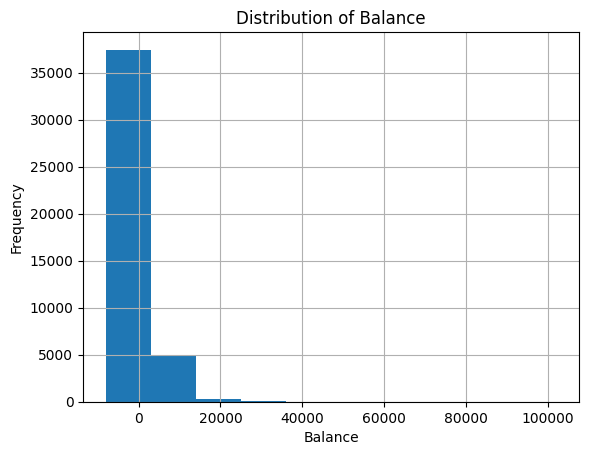

In [20]:
df['balance'].hist()
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.title('Distribution of Balance')
#Most people have close to 0 balance, kinda sad

(array([3.7461e+04, 4.1160e+03, 8.2600e+02, 1.7000e+02, 4.2000e+01,
        1.1000e+01, 1.1000e+01, 1.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([   0. ,  491.8,  983.6, 1475.4, 1967.2, 2459. , 2950.8, 3442.6,
        3934.4, 4426.2, 4918. ]),
 <BarContainer object of 10 artists>)

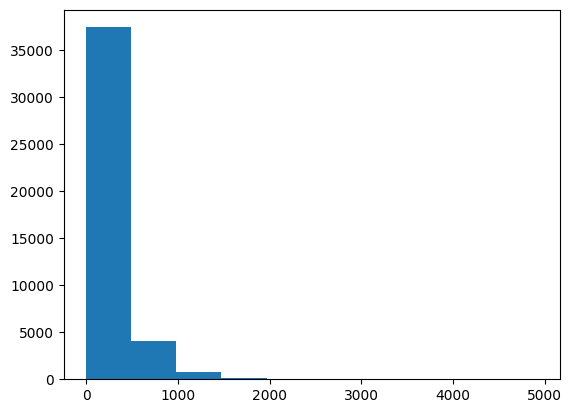

In [21]:
plt.hist(df['duration'])
# Most pople have not kept their account for a long time!

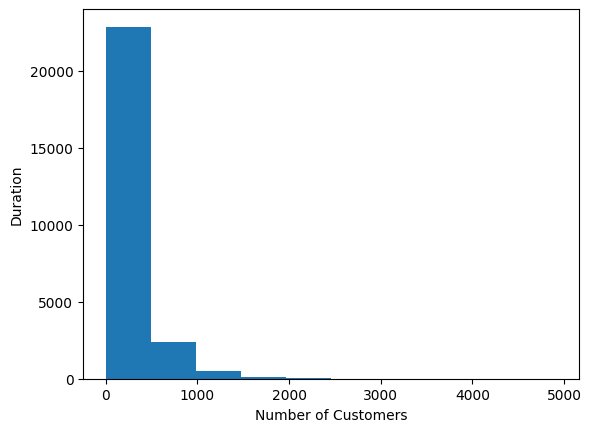

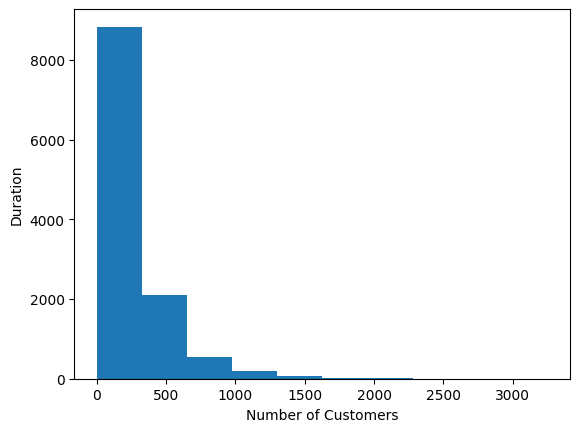

In [42]:
married_customers = pd.read_sql('SELECT * FROM data_2nf WHERE marital = "married" ORDER BY balance DESC;', conn)
single_customers = pd.read_sql('SELECT * FROM data_2nf WHERE marital = "single" ORDER BY balance DESC;', conn)

plt.hist(married_customers['duration'])
plt.ylabel('Duration')

plt.xlabel('Number of Customers')

plt.show()
plt.hist(single_customers['duration'])
plt.ylabel('Duration')

plt.xlabel('Number of Customers')
plt.show()
#There is slightly more positive skew towards single customers keeping their accounts longer

Text(0.5, 1.0, 'Distribution of Age and Balance')

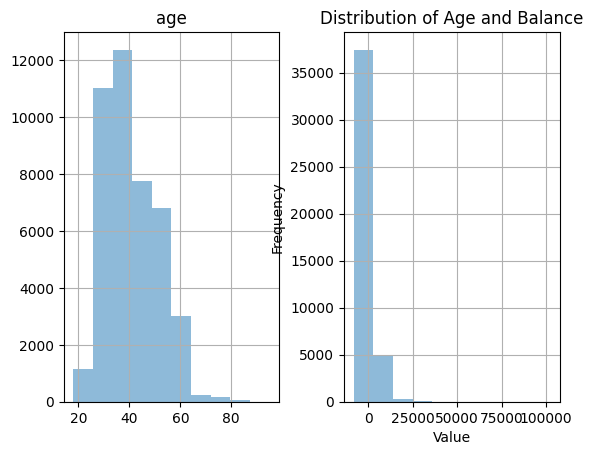

In [24]:
df[['age', 'balance']].hist(alpha=0.5)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of Age and Balance')
#Sad again

In [34]:
print(df.corr())

               age   balance       day  duration  campaign     pdays  \
age       1.000000  0.088716 -0.009869 -0.016529  0.008296 -0.044165   
balance   0.088716  1.000000  0.004696  0.016721 -0.013358 -0.006797   
day      -0.009869  0.004696  1.000000 -0.032557  0.165906 -0.101391   
duration -0.016529  0.016721 -0.032557  1.000000 -0.085640 -0.010812   
campaign  0.008296 -0.013358  0.165906 -0.085640  1.000000 -0.079981   
pdays    -0.044165 -0.006797 -0.101391 -0.010812 -0.079981  1.000000   
previous -0.016279  0.005194 -0.048445 -0.007730 -0.024374  0.450869   
id       -0.008555  0.065374 -0.058495 -0.001111 -0.082718  0.414655   

          previous        id  
age      -0.016279 -0.008555  
balance   0.005194  0.065374  
day      -0.048445 -0.058495  
duration -0.007730 -0.001111  
campaign -0.024374 -0.082718  
pdays     0.450869  0.414655  
previous  1.000000  0.226062  
id        0.226062  1.000000  


In [55]:
#What features do I need to cluster?
#I think age, pdays, previous, day, education and campaing, just from a quick glance
features = ['age', 'pdays', 'previous', 'day', 'campaign', 'education']
df_train = df[features]
df_train['education'] = df_train['education'].astype('category').cat.codes
print(df_train)

       age  pdays  previous  day  campaign  education
0       58     -1         0    5         1          2
1       44     -1         0    5         1          1
2       33     -1         0    5         1          1
3       47     -1         0    5         1          3
4       33     -1         0    5         1          3
...    ...    ...       ...  ...       ...        ...
42634   21     92         1   12         2          1
42635   87     -1         0   12         2          0
42636   34     97         1   13         4          0
42637   22     -1         0   13         2          1
42638   32     -1         0   13         1          2

[42639 rows x 6 columns]


C:\Users\Bobby\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


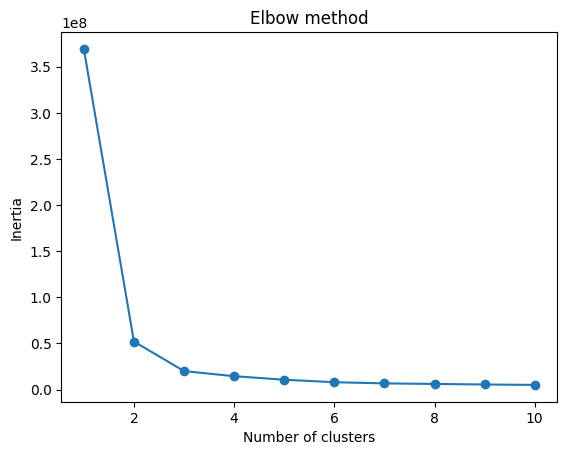

In [56]:
from sklearn.cluster import KMeans
inertias = []
for i in range(1,11):
    kmeans = KMeans(n_clusters =i)
    kmeans.fit(df_train)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show() 

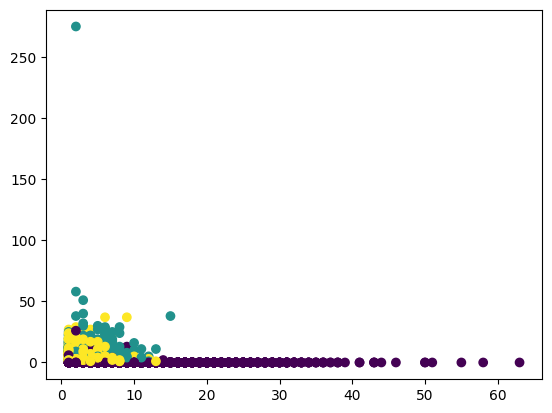

In [62]:
#Used elbow method 
kmeans = KMeans(n_clusters=3)
kmeans.fit(df_train)

plt.scatter(df_train['campaign'], df_train['previous'], c=kmeans.labels_)
plt.show()